In [1]:
# 基本信息
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# 股票数据的读取
import pandas_datareader as pdr

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# time
from datetime import datetime

# 读取信息

In [3]:
start = datetime(2020,9,20)
company = ['AAPL','GOOG','MSFT','AMZN','FB']
top_tech_df = pdr.get_data_yahoo(company,start=start)['Adj Close']

In [5]:
top_tech_df.to_csv('top5.csv')

In [6]:
top_tech_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN,FB
Date,,,,,
2020-09-21,109.726448,1431.160034,201.546921,2960.469971,248.149994
2020-09-22,111.450882,1465.459961,206.402985,3128.989990,254.750000
2020-09-23,106.775963,1415.209961,199.606476,2999.860107,249.020004
2020-09-24,107.872421,1428.290039,202.193741,3019.790039,249.529999
2020-09-25,111.919373,1444.959961,206.801041,3095.129883,254.820007


In [8]:
top_tech_dr = top_tech_df.pct_change()

In [9]:
top_tech_dr.head()

Symbols,AAPL,GOOG,MSFT,AMZN,FB
Date,,,,,
2020-09-21,NaN,NaN,NaN,NaN,NaN
2020-09-22,0.015716,0.023967,0.024094,0.056923,0.026597
2020-09-23,-0.041946,-0.034290,-0.032928,-0.041269,-0.022493
2020-09-24,0.010269,0.009243,0.012962,0.006644,0.002048
2020-09-25,0.037516,0.011671,0.022787,0.024949,0.021200


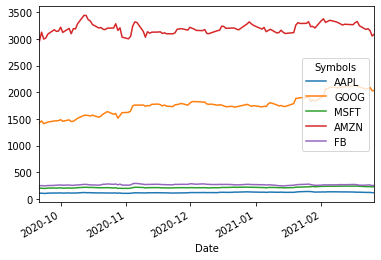

In [10]:
top_tech_df.plot()

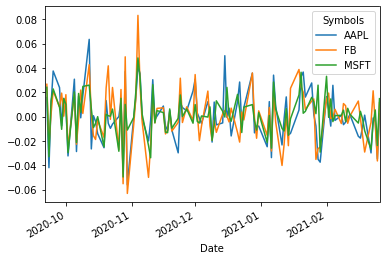

In [16]:
top_tech_dr[['AAPL','FB','MSFT']].plot()

# 散点图绘制 daily return
- 根据点的分散来分析两个数据之间的关系，若成正比，表示两者具有正相关。

## sns.jointplot()：两个数据进行对比

### 参数：

- first : x 轴 label;
- second ：y 轴 label；
- third : 目标数据集合；
- kind : 画图线状，scatter 表示点；

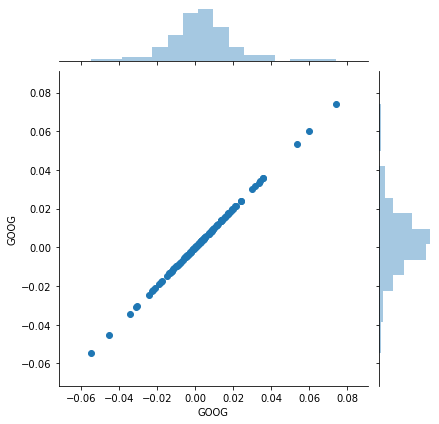

In [17]:
sns.jointplot('GOOG','GOOG',top_tech_dr,kind='scatter')

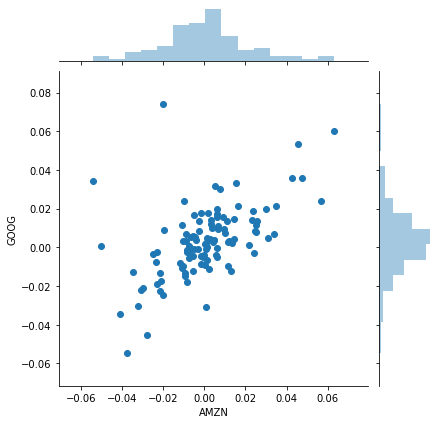

In [18]:
sns.jointplot('AMZN','GOOG',top_tech_dr,kind='scatter')

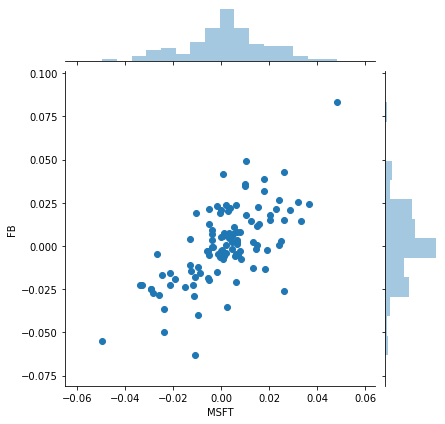

In [19]:
sns.jointplot('MSFT','FB',top_tech_dr,kind='scatter')

## sns.pairplot() : 多数据比较

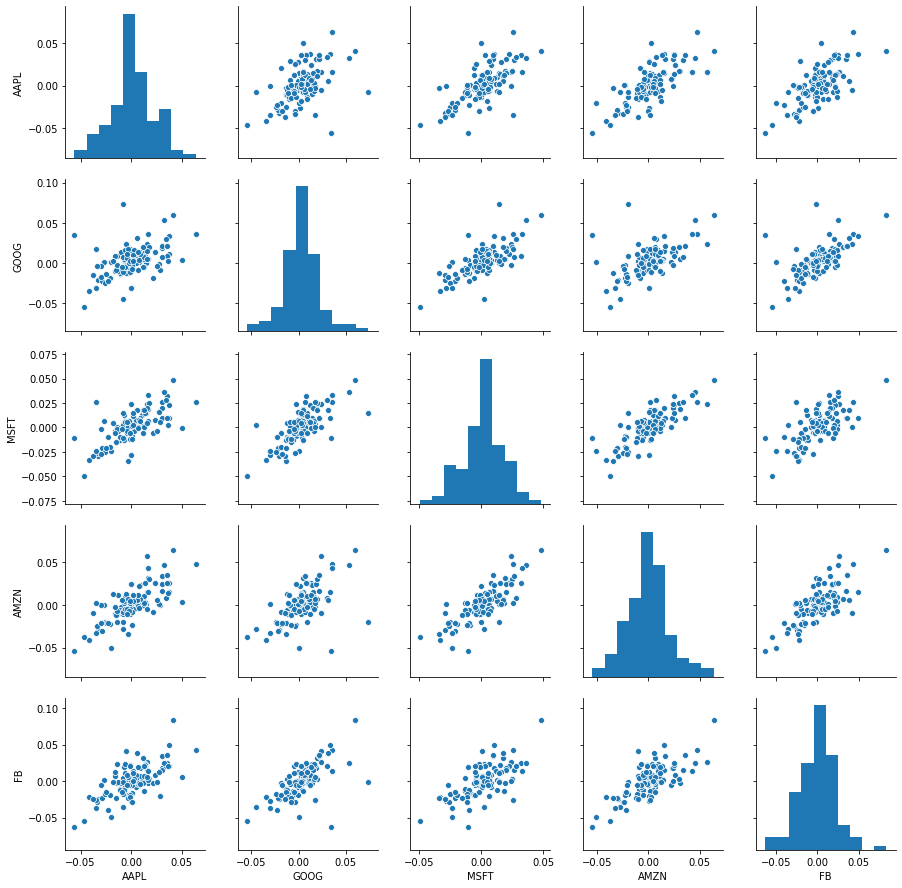

In [20]:
sns.pairplot(top_tech_dr.dropna())

## quantile() 查看关于风险状况

- 参数：
    - 概率性百分比,有 1.00 - 概率性百分比的信心使 daily return 最大，即,有1.00 - 概率性百分比的信息 得到每天的最大亏损.
    - 正数：盈利，负数：亏损。

In [21]:
top_tech_dr['AAPL'].quantile(0.52)

0.00047125328794233153

In [23]:
top_tech_dr['MSFT'].quantile(0.02)

-0.03238164035703012

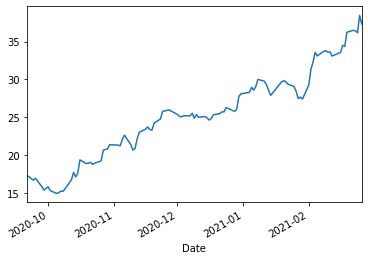

In [24]:
vips = pdr.get_data_yahoo('VIPS',start=start)['Adj Close']
vips.plot()

In [27]:
vips.pct_change().quantile(0.2)

-0.013795037693514199